# Trabalho final da Disciplina de Inteligência Artificial PPGI 2025
## Aluno: Matheus Pereira dos Santos

Análise Exploratória


In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Configurando opcao de visualização do pandas
pd.set_option('display.max_columns', None)
# Importando base de dados
base_em_uso = pd.read_csv(
    'Despesas_Empenhadas_Liquidadas_e_Pagas.CSV',
    sep=";")

base_em_uso.columns

Index(['Número do empenho', 'Ano de exercício', 'Categoria do empenho',
       'Data do empenho', 'Histórico do empenho', 'Valor do empenho',
       'Valor liquidado R$', 'Valor pago R$'],
      dtype='object')

In [6]:
base_despesas_df = base_em_uso.rename(columns={
    'Número do empenho': 'empenho_num',
    'Ano de exercício': 'ano_exercicio',
    'Categoria do empenho': 'empenho_categ',
    'Data do empenho': 'empenho_data',
    'Histórico do empenho': 'empenho_hist',
    'Valor do empenho': 'empenho_val',
    'Valor liquidado R$': 'valor_liquid',
    'Valor pago R$': 'valor_pago'
})
base_despesas_df.columns

Index(['empenho_num', 'ano_exercicio', 'empenho_categ', 'empenho_data',
       'empenho_hist', 'empenho_val', 'valor_liquid', 'valor_pago'],
      dtype='object')

In [7]:
#Busca valroes nulos
base_despesas_df


,empenho_num,ano_exercicio,empenho_categ,empenho_data,empenho_hist,empenho_val,valor_liquid,valor_pago
0,4052,2025,PROCESSO,10/06/2025,INSCRIÇÃO E CUSTEIO DE DESPESAS PARA PARTICIP...,"R$ 400,00","R$ 400,00","R$ 400,00"
1,3937,2025,DIARIA,03/06/2025,REFERENTE A 5 + 1/2 (CINCO DIÁRIAS E MEIA ) ...,"R$ 2.750,00","R$ 2.750,00","R$ 2.750,00"
2,3936,2025,DIARIA,03/06/2025,REFERENTE A 5 + 1/2 (CINCO DIÁRIAS E MEIA ) ...,"R$ 4.400,00","R$ 4.400,00","R$ 4.400,00"
3,3741,2025,CREDOR,28/05/2025,REPASSE DE RECURSO REFERENTE À REDE DE SAÚDE ...,"R$ 102.000,00","R$ 102.000,00","R$ 102.000,00"
4,3739,2025,FOLHA,28/05/2025,PELA DESPESA DE FOLHA DE PAGAMENTO EMPENHADA ...,"R$ 2.090,11","R$ 2.090,11","R$ 2.090,11"
...,...,...,...,...,...,...,...,...
9995,4308,2024,PROCESSO,30/04/2024,"AQUISIÇÃO DE MEDICAMENTOS, PARA ATENDER O DEP...","R$ 62.029,90","R$ 61.558,83","R$ 61.558,83"
9996,4307,2024,PROCESSO,30/04/2024,"AQUISIÇÃO DE ALIMENTOS, PARA ATENDER A ASSIST...","R$ 2.005,00","R$ 2.005,00","R$ 2.005,00"
9997,4306,2024,CREDOR,30/04/2024,"Aquisição de 12 (doze), caixas do medicamento...","R$ 2.100,00","R$ 2.100,00","R$ 2.100,00"
9998,4305,2024,CREDOR,29/04/2024,PELA DESPESA DE FOLHA DE PAGAMENTO EMPENHADA ...,"R$ 60.522,63","R$ 60.522,63","R$ 60.522,63"


In [8]:
base_despesas_df.isna().sum()

,0
empenho_num,0
ano_exercicio,0
empenho_categ,0
empenho_data,0
empenho_hist,0
empenho_val,0
valor_liquid,0
valor_pago,0


In [9]:
base_despesas_df['empenho_num'].duplicated()

,empenho_num
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [10]:
# descrevendo a base
base_despesas_df.dtypes

,0
empenho_num,int64
ano_exercicio,int64
empenho_categ,object
empenho_data,object
empenho_hist,object
empenho_val,object
valor_liquid,object
valor_pago,object


In [11]:
base_despesas_df.describe()
#Buscar valores numéricos

,empenho_num,ano_exercicio
count,10000.000000,10000.000000
mean,6106.587000,2024.304700
std,3366.118879,0.460303
min,1.000000,2024.000000
25%,3011.750000,2024.000000
50%,6323.500000,2024.000000
75%,8979.250000,2025.000000
max,11780.000000,2025.000000


In [12]:
# transforma a coluna de valor de empenho em float64 e faz a mesma para valor líquido e pago
base_despesas_df['empenho_val'] = base_despesas_df['empenho_val'].str.strip()
base_despesas_df['empenho_val'] = base_despesas_df['empenho_val'].str.replace('R$ ', '').str.replace('.', '').str.replace(',', '.').astype(float)


In [13]:
base_despesas_df['valor_liquid'] = base_despesas_df['valor_liquid'].str.strip()
base_despesas_df['valor_liquid'] = base_despesas_df['valor_liquid'].str.replace('R$ ', '').str.replace('.', '').str.replace(',', '.').astype(float)

In [14]:
base_despesas_df['valor_pago'] = base_despesas_df['valor_pago'].str.strip()
base_despesas_df['valor_pago'] = base_despesas_df['valor_pago'].str.replace('R$ ', '').str.replace('.', '').str.replace(',', '.').astype(float)


base_despesas_df

,empenho_num,ano_exercicio,empenho_categ,empenho_data,empenho_hist,empenho_val,valor_liquid,valor_pago
0,4052,2025,PROCESSO,10/06/2025,INSCRIÇÃO E CUSTEIO DE DESPESAS PARA PARTICIP...,400.00,400.00,400.00
1,3937,2025,DIARIA,03/06/2025,REFERENTE A 5 + 1/2 (CINCO DIÁRIAS E MEIA ) ...,2750.00,2750.00,2750.00
2,3936,2025,DIARIA,03/06/2025,REFERENTE A 5 + 1/2 (CINCO DIÁRIAS E MEIA ) ...,4400.00,4400.00,4400.00
3,3741,2025,CREDOR,28/05/2025,REPASSE DE RECURSO REFERENTE À REDE DE SAÚDE ...,102000.00,102000.00,102000.00
4,3739,2025,FOLHA,28/05/2025,PELA DESPESA DE FOLHA DE PAGAMENTO EMPENHADA ...,2090.11,2090.11,2090.11
...,...,...,...,...,...,...,...,...
9995,4308,2024,PROCESSO,30/04/2024,"AQUISIÇÃO DE MEDICAMENTOS, PARA ATENDER O DEP...",62029.90,61558.83,61558.83
9996,4307,2024,PROCESSO,30/04/2024,"AQUISIÇÃO DE ALIMENTOS, PARA ATENDER A ASSIST...",2005.00,2005.00,2005.00
9997,4306,2024,CREDOR,30/04/2024,"Aquisição de 12 (doze), caixas do medicamento...",2100.00,2100.00,2100.00
9998,4305,2024,CREDOR,29/04/2024,PELA DESPESA DE FOLHA DE PAGAMENTO EMPENHADA ...,60522.63,60522.63,60522.63


array([[<Axes: title={'center': 'empenho_num'}>,
        <Axes: title={'center': 'ano_exercicio'}>],
       [<Axes: title={'center': 'empenho_val'}>,
        <Axes: title={'center': 'valor_liquid'}>],
       [<Axes: title={'center': 'valor_pago'}>, <Axes: >]], dtype=object)

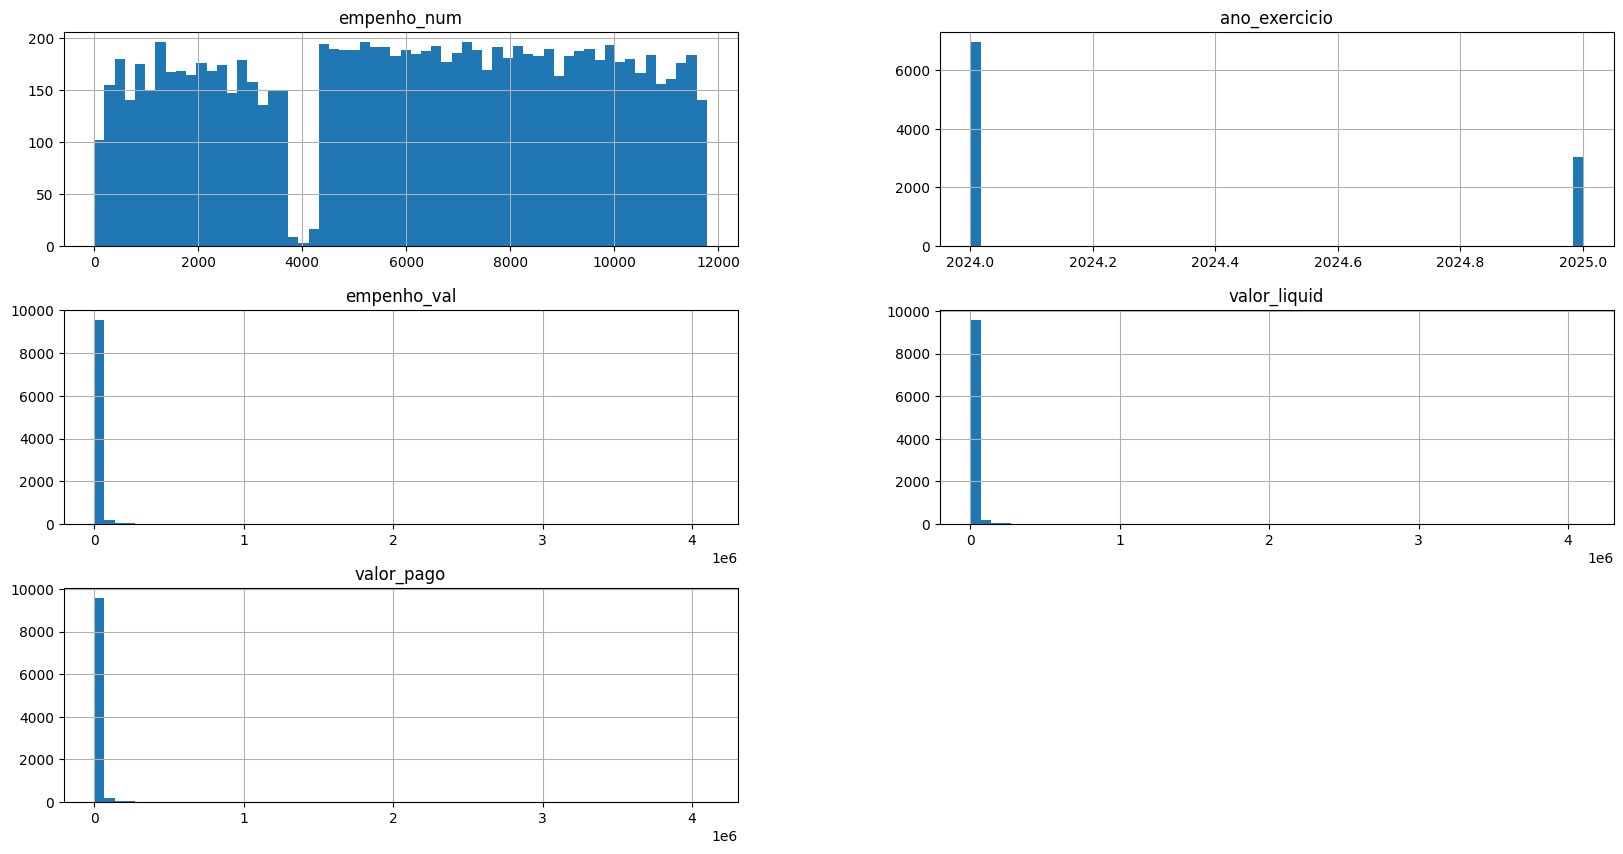

In [15]:
base_despesas_df.hist(bins=60, figsize=(20,10))

<Axes: xlabel='empenho_num', ylabel='valor_pago'>

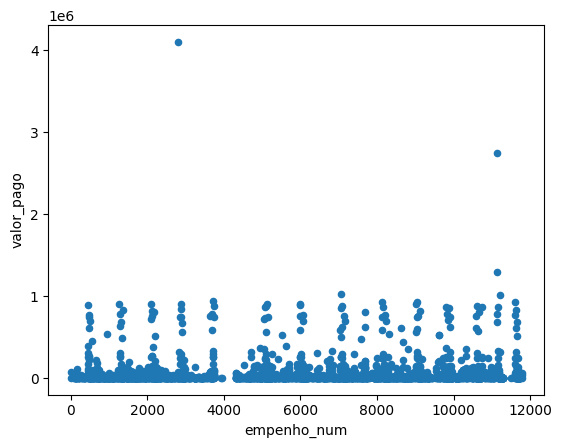

In [16]:
superior_mil = base_despesas_df[base_despesas_df['valor_pago'] > 1_000]
superior_mil[['empenho_num', 'valor_pago']].plot(kind='scatter', x='empenho_num', y='valor_pago')

<Axes: xlabel='empenho_num', ylabel='valor_pago'>

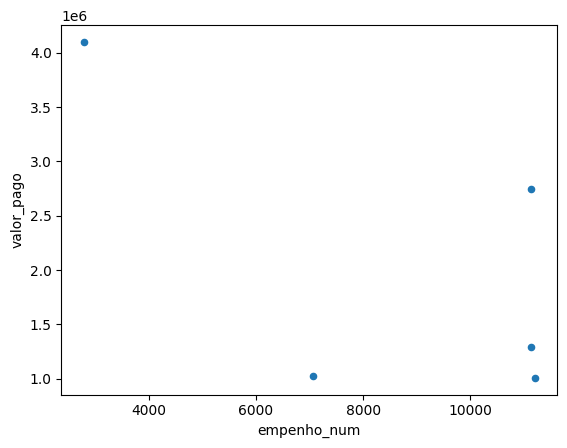

In [17]:
superior_milhao = base_despesas_df[base_despesas_df['valor_pago'] > 1_000_000]
superior_milhao[['empenho_num', 'valor_pago']].plot(kind='scatter', x='empenho_num', y='valor_pago')

In [18]:
superior_milhao

,empenho_num,ano_exercicio,empenho_categ,empenho_data,empenho_hist,empenho_val,valor_liquid,valor_pago
750,2795,2025,CREDOR,25/04/2025,REFERENTE AO RECOLHIMENTO DE GUIA - PRECATÓRI...,4100000.00,4100000.00,4100000.00
3534,11204,2024,FOLHA,19/12/2024,PELA DESPESA DE FOLHA DE PAGAMENTO EMPENHADA ...,1008285.77,1008285.77,1008285.77
3598,11140,2024,FOLHA,19/12/2024,PELA DESPESA DE FOLHA DE PAGAMENTO EMPENHADA ...,1291928.40,1291928.40,1291928.40
3599,11139,2024,PRECATORIO,18/12/2024,PRECATÓRIOS 2024.,2741343.50,2741343.50,2741343.50
7354,7058,2024,FOLHA,30/07/2024,PELA DESPESA DE FOLHA DE PAGAMENTO EMPENHADA ...,1026816.49,1026816.49,1026816.49


<Axes: xlabel='ano_exercicio'>

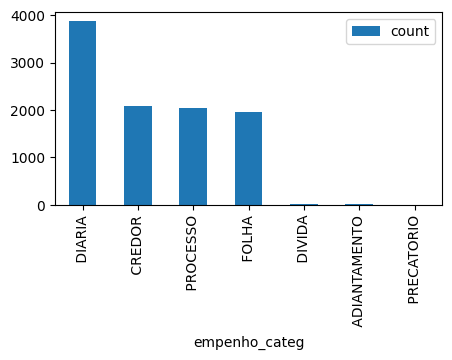

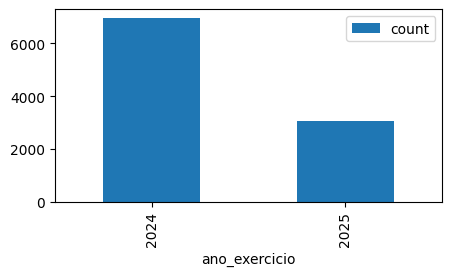

In [19]:
pd.DataFrame(base_despesas_df['empenho_categ'].value_counts()).plot(kind='bar', figsize=[5,2.5])
pd.DataFrame(base_despesas_df['ano_exercicio'].value_counts()).plot(kind='bar', figsize=[5,2.5])

<Axes: xlabel='empenho_categ'>

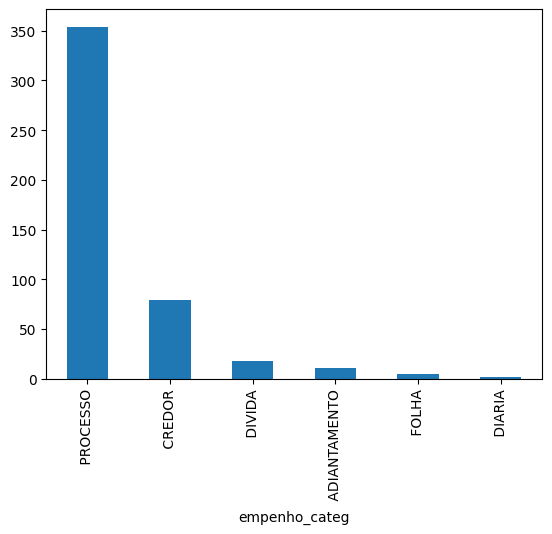

In [20]:
base_despesas_df[base_despesas_df['valor_pago'] != base_despesas_df['empenho_val']]['empenho_categ'].value_counts().plot(kind='bar')

In [66]:
# agregar por períodos
#base_despesas_df['empenho_data'] = pd.to_datetime(base_despesas_df['empenho_data'].str.strip(), format='%d/%m/%Y')
base_despesas_df_agrupado['empenho_categ'] = base_despesas_df['empenho_categ'].str.replace(' ', '')
base_despesas_df_agrupado = base_despesas_df.groupby([pd.Grouper(key='empenho_data', freq='M'), 'empenho_categ'])['empenho_val'].sum().reset_index()
base_despesas_df_agrupado['mes'] = base_despesas_df_agrupado['empenho_data'].dt.month
base_despesas_df_agrupado['empenho_val_normalizado'] = base_despesas_df_agrupado.groupby('empenho_categ')['empenho_val'].transform(lambda x: (x - x.mean()) / x.std())
print(base_despesas_df_agrupado.head())
# pivotar a tabela
df_pivot = base_despesas_df_agrupado.pivot(index='empenho_data', columns='empenho_categ', values='empenho_val').fillna(0)
print(df_pivot.head())

  empenho_data  empenho_categ  empenho_val  mes  empenho_val_normalizado
0   2024-04-30         CREDOR     89548.91    4                -1.115323
1   2024-04-30         DIARIA      1250.00    4                -2.005092
2   2024-04-30       PROCESSO     64034.90    4                -1.038509
3   2024-05-31   ADIANTAMENTO      2639.09    5                -0.211820
4   2024-05-31         CREDOR   1891024.86    5                 0.147757
empenho_categ  ADIANTAMENTO      CREDOR   DIARIA      DIVIDA       FOLHA  \
empenho_data                                                               
2024-04-30             0.00    89548.91   1250.0        0.00        0.00   
2024-05-31          2639.09  1891024.86  62947.5  3090000.00  8235585.42   
2024-06-30             0.00  1177369.68  45880.0        0.00  8398522.76   
2024-07-31          2810.00  1838500.18  52620.0  2060000.00  8551504.21   
2024-08-31           705.00   802752.60  45215.0  1390733.84  8369676.30   

empenho_categ  PRECATORIO    

/tmp/ipython-input-66-409418074.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  base_despesas_df_agrupado = base_despesas_df.groupby([pd.Grouper(key='empenho_data', freq='M'), 'empenho_categ'])['empenho_val'].sum().reset_index()


VISUALIZAÇÃO

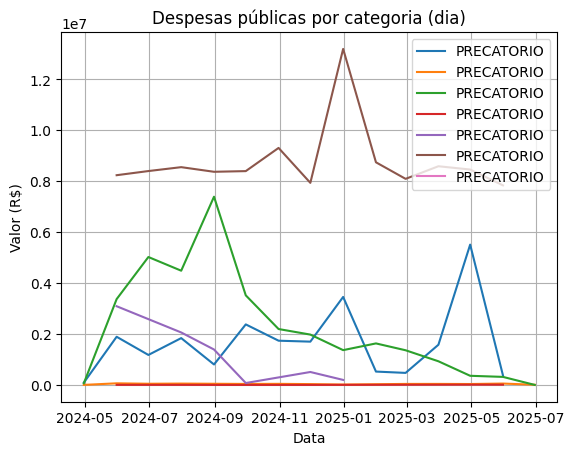

In [67]:
import matplotlib.pyplot as pyplot

for categ in base_despesas_df_agrupado['empenho_categ'].unique():
  dados = base_despesas_df_agrupado[base_despesas_df_agrupado['empenho_categ'] == categ]
  pyplot.plot(dados['empenho_data'], dados['empenho_val'], label=categoria)

pyplot.legend()
pyplot.title('Despesas públicas por categoria (dia)')
pyplot.xlabel('Data')
pyplot.ylabel('Valor (R$)')
pyplot.grid()
pyplot.show()

In [68]:
# Salvar dados
base_despesas_df_agrupado.to_csv('base_despesas_agrupado.csv', index=False)
df_pivot.to_csv('despesas_pivot_mensal.csv')

Análise de Tendências

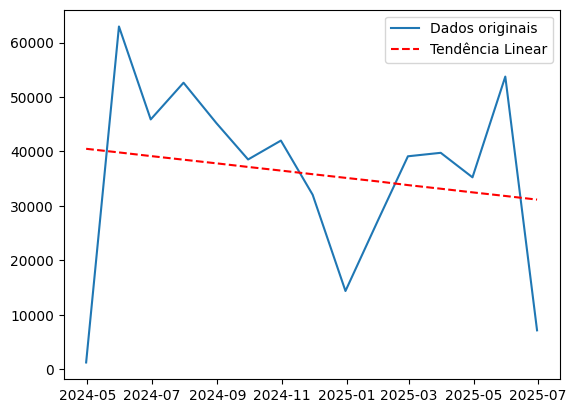

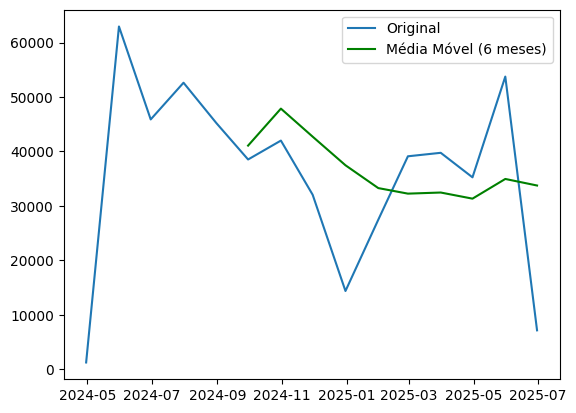

In [76]:
#Regressão Linear Simples
x = np.arange(len(df_pivot))
y = df_pivot[' DIARIA']

coef = np.polyfit(x, y, 1)
trend_line = np.polyval(coef, x) # avaliar o valor polinomial especifico

pyplot.plot(df_pivot.index, y, label = 'Dados originais')
pyplot.plot(df_pivot.index, trend_line, 'r--', label='Tendência Linear')
pyplot.legend()
pyplot.show()

# Média movel
window_size = 6
df_pivot['DIARIA_MA'] = df_pivot[' DIARIA'].rolling(window=window_size).mean()

# Plotar
pyplot.plot(df_pivot.index, df_pivot[' DIARIA'], label='Original')
pyplot.plot(df_pivot.index, df_pivot['DIARIA_MA'], 'g-', label=f'Média Móvel ({window_size} meses)')
pyplot.legend()

Identificação de Sazonalidade

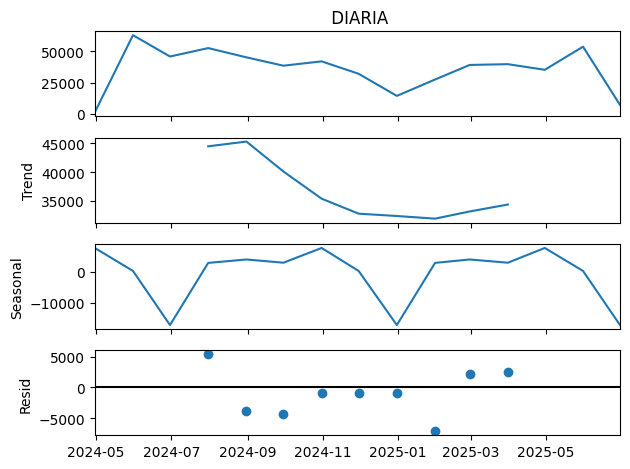

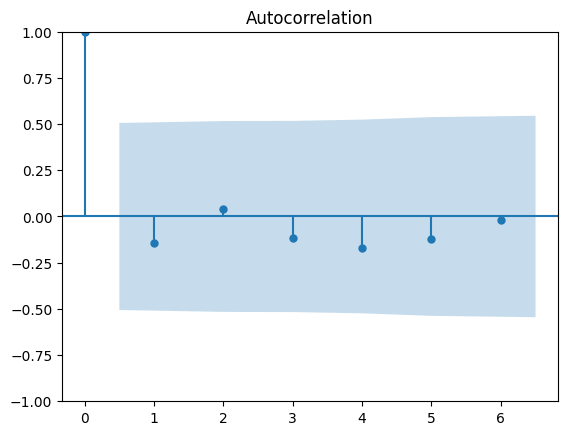

In [83]:

## Decomposição clássica
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

result = seasonal_decompose(df_pivot[' DIARIA'], model='additive', period=6)
result.plot()
pyplot.show()

# autocorrelação
plot_acf(df_pivot[' DIARIA'], lags=6)
pyplot.show()

Identificação de outliers